In [64]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from PIL import Image
import keras.backend as K
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
train_dir = "C:/Users/USER/Celebal Technologies/Week 3/Week 3 (2)/data/train"
test_dir = "C:/Users/USER/Celebal Technologies/Week 3/Week 3 (2)/data/test"

In [15]:
train_datagen = ImageDataGenerator(
                                   rescale = 1./255,
                                   validation_split = 0.2,
                            
                                  )
test_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2,
                                    )

In [16]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (128,128),
                                                    batch_size = 64,
                                                    shuffle  = True , 
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training",
                                                    seed = 12
                                                   )
validation_generator = test_datagen.flow_from_directory(directory = train_dir,
                                                         target_size = (128,128),
                                                         batch_size = 64,
                                                         shuffle  = True , 
                                                         color_mode = "grayscale",
                                                         class_mode = "categorical",
                                                         subset = "validation",
                                                         seed = 12
                                                        )
test_generator = test_datagen.flow_from_directory(directory = test_dir,
                                                    target_size = (128,128),
                                                    batch_size = 64,
                                                    shuffle  = False , 
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    seed = 12
                                                  )

Found 12832 images belonging to 3 classes.
Found 3208 images belonging to 3 classes.
Found 3979 images belonging to 3 classes.


In [17]:
model=Sequential()

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(128,128,1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [19]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 16)      160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 28800)             0         
                                                                 
 dense_1 (Dense)             (None, 3)                

In [75]:
model.fit(x=train_generator,epochs = 20,validation_data = validation_generator)

Epoch 1/20
201/201 [==============================] - 211s 1s/step - loss: 0.4368 - accuracy: 0.8288 - val_loss: 1.0859 - val_accuracy: 0.5979
Epoch 2/20
201/201 [==============================] - 71s 354ms/step - loss: 0.3907 - accuracy: 0.8486 - val_loss: 1.1528 - val_accuracy: 0.6004
Epoch 3/20
201/201 [==============================] - 72s 357ms/step - loss: 0.3505 - accuracy: 0.8668 - val_loss: 1.2309 - val_accuracy: 0.5916
Epoch 4/20
201/201 [==============================] - 73s 361ms/step - loss: 0.3063 - accuracy: 0.8883 - val_loss: 1.3063 - val_accuracy: 0.5976
Epoch 5/20
201/201 [==============================] - 73s 361ms/step - loss: 0.2707 - accuracy: 0.9006 - val_loss: 1.3939 - val_accuracy: 0.5845
Epoch 6/20
201/201 [==============================] - 79s 391ms/step - loss: 0.2330 - accuracy: 0.9184 - val_loss: 1.5052 - val_accuracy: 0.5879
Epoch 7/20
201/201 [==============================] - 69s 344ms/step - loss: 0.2097 - accuracy: 0.9277 - val_loss: 1.5951 - val_accu

In [76]:
for layer in model.layers:
    
    if 'conv' not in layer.name:
        continue    
    filters , bias = layer.get_weights()
    print(layer.name , filters.shape)

conv2d_2 (3, 3, 1, 16)
conv2d_3 (3, 3, 16, 32)


In [77]:
# retrieve weights from the second hidden layer
weights = model.layers[1].get_weights()
if len(weights) == 2:
    filters, bias = weights
else:
    filters = weights[0]
    bias = None 

In [78]:
for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' not in layer.name:
        continue    
    print(i , layer.name , layer.output.shape)

0 conv2d_2 (None, 126, 126, 16)
2 conv2d_3 (None, 61, 61, 32)


conv2d_2 (3, 3, 1, 16)
16


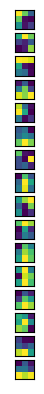

conv2d_3 (3, 3, 16, 32)
32


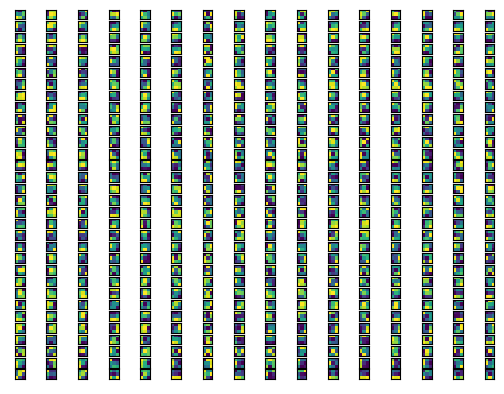

In [79]:
for layer in model.layers:
    if 'conv' in layer.name:
        weights, bias = layer.get_weights()
        print(layer.name, weights.shape)
        # Normalize filter values between 0 and 1 for visualization
        f_min, f_max = weights.min(), weights.max()
        filters = (weights - f_min) / (f_max - f_min)
        print(filters.shape[3])
        filter_cnt = 1
        # Plotting all the filters
        for i in range(filters.shape[3]):
            # Get the filters
            filt = filters[:, :, :, i]
            # Plotting each of the channels, color image RGB channels
            for j in range(filters.shape[2]):
                ax = plt.subplot(filters.shape[3], filters.shape[2], filter_cnt)
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:, :, j])
                filter_cnt += 1
        plt.show()

1/1 [==============================] - 0s 38ms/step


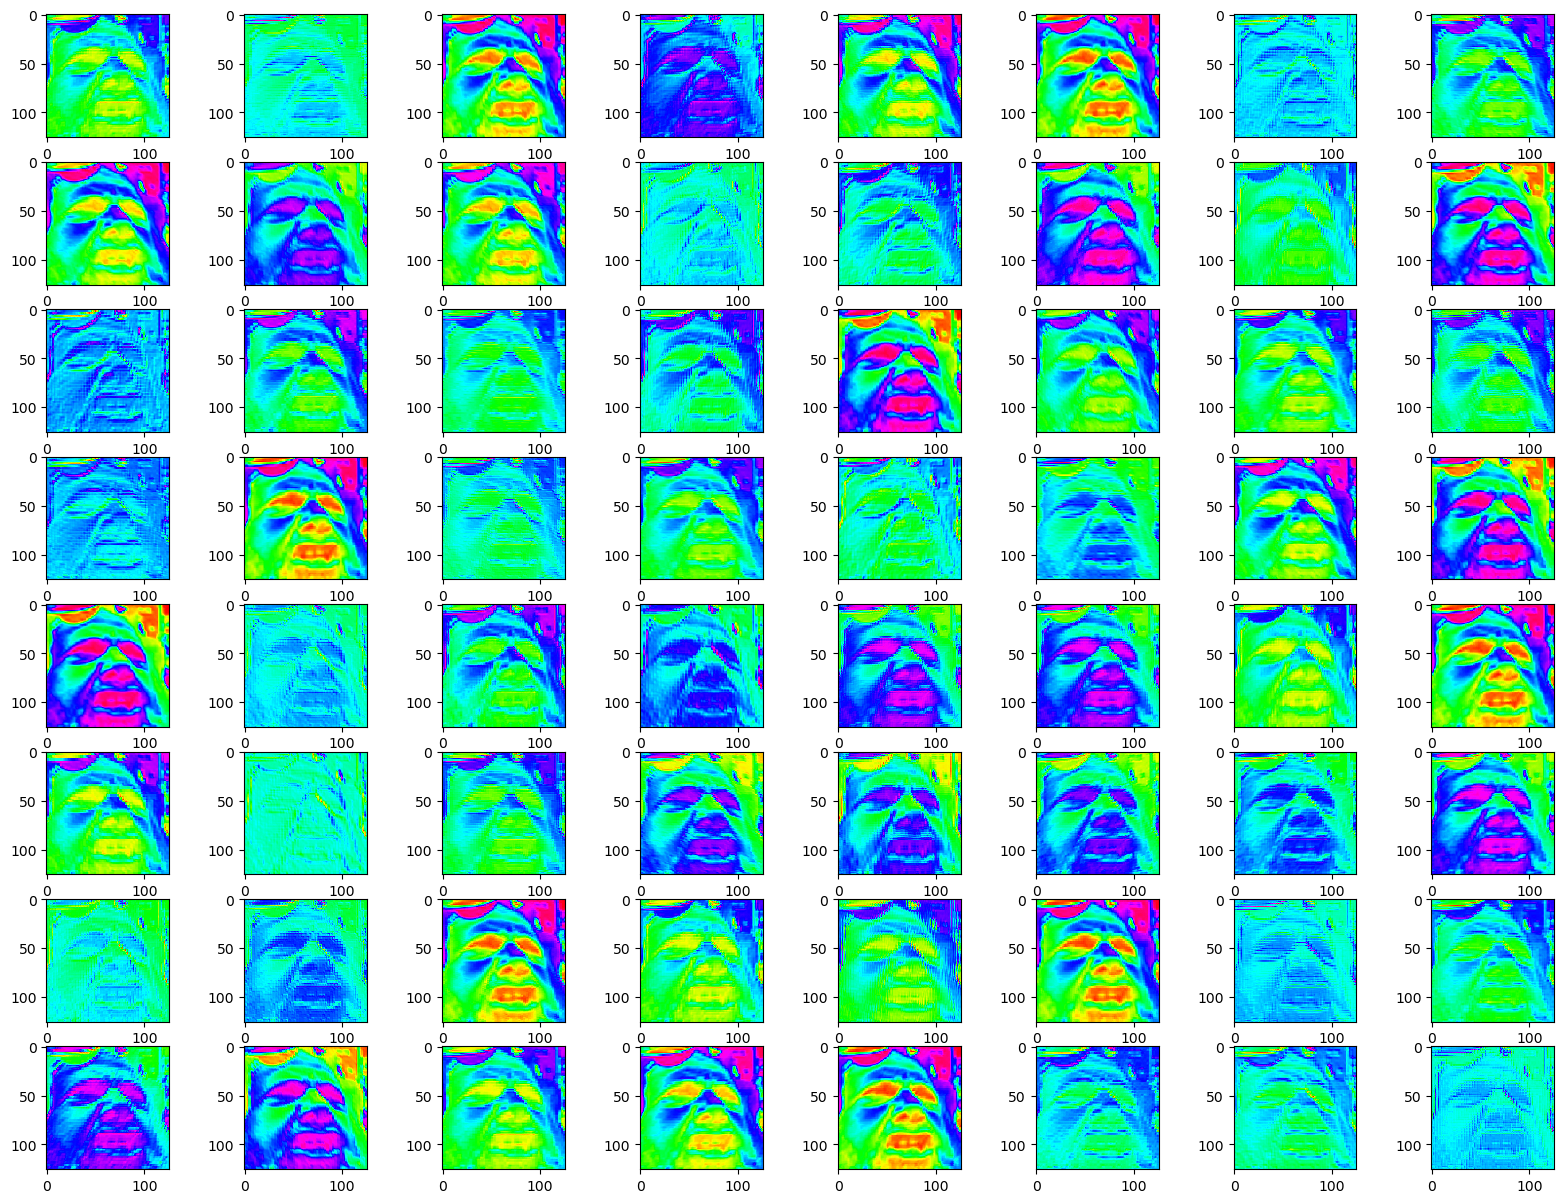

In [80]:
image = load_img("C:/Users/USER/Celebal Technologies/Week 3/Week 3 (2)/data/test/angry/PrivateTest_731447.jpg", target_size=(128, 128))
image = img_to_array(image)
image = preprocess_input(image)
image = image.reshape((1, 128, 128, 3))  # Reshape to match the provided image shape

# Create a new model with the desired input shape
new_model = Sequential()
new_model.add(Conv2D(64, (3, 3), input_shape=(128, 128, 3)))  # Modify the input shape accordingly
# Add the rest of your model layers here

# Calculate feature maps
features = new_model.predict(image)

# Visualize feature maps
fig = plt.figure(figsize=(20, 15))
for i in range(1, features.shape[3] + 1):
    plt.subplot(8, 8, i)
    plt.imshow(features[0, :, :, i - 1], cmap='hsv')

plt.show()